In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
files = ['results_mnist.csv', 'results_mnist_rate.csv', "results_mnist_latency.csv"]

data = []
for f in files:
    # mnist_rsnn_Z1Z2
    data.append(pd.read_csv('results/mnist_rsnn_Z1Z2/' + f))


results_mnist
0.8532993071352726 0.009557800246029568
results_mnist_rate
0.8667981975162123 0.026534048060708536
results_mnist_latency
0.9077000681471867 0.011890981170071325


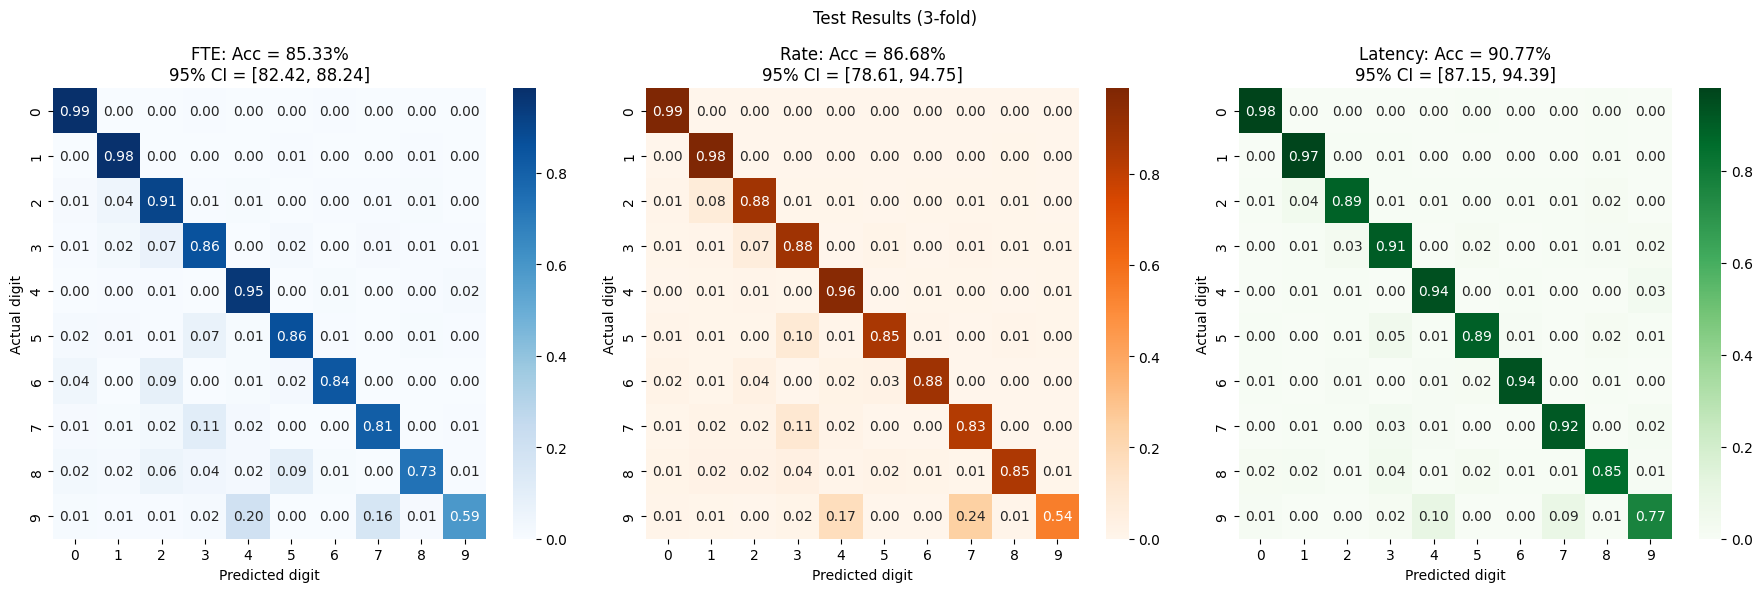

In [5]:
from sklearn.metrics import f1_score, matthews_corrcoef, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix
import scipy.stats as st

fig, ax = plt.subplots(1, len(data), figsize=(6*len(data), 6))
for i, d in enumerate(data):
    f = files[i].split('.')[0]
    print(f)
    if "rate" in f:
        r = "Rate"
        f = f.split('_')[1] + " rate"
        c = "Oranges"
        column = 1
    elif "latency" in f:
        r = "Latency"
        f = f.split('_')[1] + " latency"
        c = "Greens"
        column = 2
    else:
        r = "FTE"
        f = f.split('_')[1]
        c = "Blues"
        column = 0
    
    def convert_list_like_string(s):
        return [int(x) for x in s.split('|')]
    # sort d by subject
    d = d.sort_values(by='subj')
    
    subjects = d['subj'].to_numpy()
    
    test_labels = []
    test_preds = []
    cms = []
    acc = []
    for fold in range(3):
        test_labels.append(convert_list_like_string(d["ts_label"].values[fold]))
        test_preds.append(convert_list_like_string(d["ts_pred"].values[fold]))
        
        acc.append(accuracy_score(test_labels[fold], test_preds[fold]))
    
        cm = confusion_matrix(test_labels[fold], test_preds[fold], normalize='true')
        cms.append(cm)
    cms = np.array(cms)
    acc = np.array(acc)
    def ci(a):
        return st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
    conf = ci(acc)

    sns.heatmap(cms.mean(axis=0), annot=True, cmap=c, fmt='.2f', ax=ax[column])
    ax[i].set_title(f"{r}: Acc = {acc.mean()*100:.2f}%\n95% CI = [{conf[0]*100:.2f}, {conf[1]*100:.2f}]")
    ax[i].set_xlabel('Predicted digit')
    ax[i].set_ylabel('Actual digit')
    
    print(acc.mean(), acc.std())
    # auc = roc_auc_score(test_labels, test_preds)
    # f1 = f1_score(test_labels, test_preds)
    # mcc = matthews_corrcoef(test_labels, test_preds)
    # print(f"AUC: {auc:.2f}, F1: {f1:.2f}, MCC: {mcc:.2f}")
    
plt.suptitle("Test Results (3-fold)")
plt.tight_layout()
plt.show()
